In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
pd.__version__

AttributeError: module 'pandas' has no attribute '__version__'

In [5]:
train_data = pd.read_csv("./data/re_train_data.csv")
test_data = pd.read_csv("./data/re_test_data.csv")

AttributeError: module 'pandas' has no attribute 'read_csv'

(array([1.42571e+05, 1.26100e+03, 2.75000e+02, 1.43000e+02, 5.70000e+01,
        1.69800e+03, 7.80000e+01, 1.13000e+02, 3.39000e+02, 1.06000e+02,
        6.58000e+02, 2.00000e+02, 2.68000e+02, 5.75000e+02, 1.67200e+03,
        1.65000e+02, 5.06000e+02, 1.54000e+02, 1.55000e+03, 4.93800e+03,
        1.05900e+03, 4.96000e+02, 1.48000e+02, 1.84000e+03, 3.52000e+03,
        8.10000e+02, 3.16000e+02, 6.20000e+02, 4.49000e+02, 1.02800e+03,
        2.34000e+02, 9.22000e+02, 2.60000e+02, 5.33000e+02, 5.23000e+02,
        2.91000e+02, 1.06000e+03, 2.66000e+02, 2.62000e+02, 2.02000e+02,
        4.41000e+02, 6.70000e+01, 5.10000e+01, 3.51000e+02, 1.22800e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45.]),
 <BarContainer object of 45 artists>)

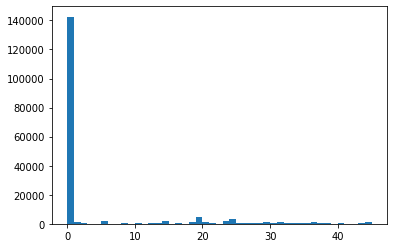

In [5]:
import matplotlib.pyplot as plt
plt.hist(train_data.label, bins=45)

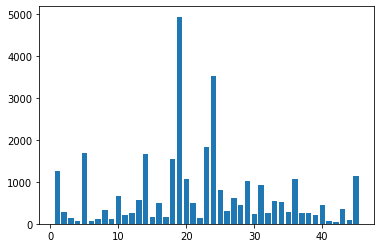

In [6]:
plt.bar(train_data.label.value_counts().sort_index().keys()[1:], train_data.label.value_counts().sort_index().values[1:]) # label 0 제외
plt.show()

- imbalanced data.

In [7]:
train_data.iloc[:3]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
0,0,2016,농업기초기반연구,농촌진흥청,신규,농산물안전성연구,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,○ 새로운 해충분류군의 동정기술 개발 및 유입확산 추적,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,"○ 새로운 돌발 및 외래해충의 신속, 정확한 동정법 향상\n\n\n○ 돌발 및 외래...","뉴클레오티드 염기서열, 분자마커, 종 동정, 침샘, 전사체","nucleotide sequence, molecular marker, species...",24
1,1,2019,이공학학술연구기반구축(R&D),교육부,신규,지역대학우수과학자지원사업(1년~5년),대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,최종목표: TRAIL 감수성 표적 유전자를 발굴하고 내성제어 기전을 연구. 발굴된...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,"1) TRAIL 내성 특이적 표적분자를 발굴하고, 이를 이용한 TRAIL 효과 증진...","대장암,항암제 내성,세포사멸,유전자발굴","TRAIL,Colorectal cancer,TRAIL resistance,Apopt...",0
2,2,2016,중소기업기술혁신개발,중소기업청,신규,혁신기업기술개발,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n* 소비자 및 바...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,* 국내 독자적인 비목질계 셀룰로오스 자원의 파이버 및 부직포 제조 등의 기술 확보...,"기능성 샐룰로오스 파이버,천연섬유,기능성 부직포,뷰티&amp;케어 제품,미용 솜","functional cellulose fiber,natural fiber,funct...",0


In [8]:
train_data.shape, test_data.shape

((174304, 13), (43576, 12))

In [9]:
train_data.columns

Index(['index', '제출년도', '사업명', '사업_부처명', '계속과제여부', '내역사업명', '과제명', '요약문_연구목표',
       '요약문_연구내용', '요약문_기대효과', '요약문_한글키워드', '요약문_영문키워드', 'label'],
      dtype='object')

In [10]:
test_data.columns   # label 없음.

Index(['index', '제출년도', '사업명', '사업_부처명', '계속과제여부', '내역사업명', '과제명', '요약문_연구목표',
       '요약문_연구내용', '요약문_기대효과', '요약문_한글키워드', '요약문_영문키워드'],
      dtype='object')

In [11]:
train_data.isna().sum()

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

In [12]:
test_data.isna().sum()

index          0
제출년도           0
사업명            0
사업_부처명         0
계속과제여부         0
내역사업명          0
과제명            0
요약문_연구목표     755
요약문_연구내용     755
요약문_기대효과     761
요약문_한글키워드    760
요약문_영문키워드    772
dtype: int64

In [13]:
train_data[train_data['요약문_연구목표'].isna()]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
34,34,2019,과학기술연합대학원대학교연구운영비지원(R&D)(운영경비),과학기술정보통신부,계속,과학기술연합대학원대학교연구운영비지원,과학기술연합대학원대학교 운영비,NaN,NaN,NaN,NaN,NaN,0
108,108,2017,한국과학기술원연구운영비지원(0.5),과학기술정보통신부,계속,글로벌교육연구선도사업,미래형융합교육프로그램운영,NaN,NaN,NaN,NaN,NaN,0
205,205,2017,지방대학육성사업(0.5),교육부,계속,지방대학 특성화사업,환경친화형 융복합 기계부품 창의 인재 양성 사업단,NaN,NaN,NaN,NaN,NaN,0
321,321,2019,국가과학기술연구회연구운영비지원(R&D)(주요사업비),과학기술정보통신부,계속,출연(연)지원육성사업,출연(연) 지원육성사업,NaN,NaN,NaN,NaN,NaN,0
328,328,2018,국민안전증진기술개발(R&D),산업통상자원부,계속,사회문제해결형 다부처공동사업,2017 사회문제해결형R&D 다부처 공동시범사업(평가관리),NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174139,174139,2016,소재부품산업기술개발기반구축,산업통상자원부,계속,기획평가관리비,소재부품산업기술개발기반구축 평가관리비,NaN,NaN,NaN,NaN,NaN,0
174173,174173,2017,미래해양자원기술개발,해양수산부,계속,기획평가관리비,미래해양자원기술개발 기획평가관리비,NaN,NaN,NaN,NaN,NaN,0
174174,174174,2017,포스트게놈신산업육성을위한다부처유전체사업(농림부),농림축산식품부,계속,기획평가관리비,포스트게놈다부처유전체사업(농림부) 기획평가관리비,NaN,NaN,NaN,NaN,NaN,0
174230,174230,2018,한국과학기술원한국과학영재학교지원(R&D),과학기술정보통신부,계속,한국과학기술원한국과학영재학교지원,한국과학기술원 한국과학영재학교 운영비,NaN,NaN,NaN,NaN,NaN,0


베이스라인 코드 참고해서, Nan -> 'NAN'

In [14]:
train_data.fillna('NAN', inplace=True)
test_data.fillna('NAN', inplace=True)

In [15]:
train_data.isna().sum()

index        0
제출년도         0
사업명          0
사업_부처명       0
계속과제여부       0
내역사업명        0
과제명          0
요약문_연구목표     0
요약문_연구내용     0
요약문_기대효과     0
요약문_한글키워드    0
요약문_영문키워드    0
label        0
dtype: int64

In [16]:
train_data.iloc[34:35]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
34,34,2019,과학기술연합대학원대학교연구운영비지원(R&D)(운영경비),과학기술정보통신부,계속,과학기술연합대학원대학교연구운영비지원,과학기술연합대학원대학교 운영비,NAN,NAN,NAN,NAN,NAN,0


NaN 값을 string 'NAN'으로 변경된 것을 알 수 있음

# '요약문_연구목표', '요약문_연구내용', '요약문_기대효과' 는 regular_expression으로 전처리

In [17]:
import re

In [150]:
def reg_expression(text):
    text = re.sub("[^가-힣ㄱ-ㅣa-zA-Z\,-\.] ","", text)
    text = re.sub("\n", " ", text)
    text = re.sub("[1-9]+\)","", text)
    text = re.sub('[\(\[]', ' ', text)
    text = re.sub('[\)\]\-<>①②③④⑤⑥⑦⑧⑨⑩⑪⑫⑬⑭⑮@$&#☆◇★○●◎◇◆□■△▲▽▼→←←↑↓↔〓◁◀▷▶♤♠♡♥♧♣⊙◈▣◐◑▒▤▥▨▧▦▩♨☏☎☜☞¶†‡↕↗↙↖↘]', '', text)
    text = re.sub(" {2,}", " ", text)
    if text[0] == ' ':
        text = text[1:]
    return text

In [274]:
re_train_data = pd.DataFrame(train_data)
re_test_data = pd.DataFrame(test_data)

In [276]:
re_train_data.iloc[:,7] = tqdm(re_train_data.iloc[:,7].apply(reg_expression)) # 요약문_연구목표
re_train_data.iloc[:,8] = tqdm(re_train_data.iloc[:,8].apply(reg_expression)) # 요약문_연구내용
re_train_data.iloc[:,9] = tqdm(re_train_data.iloc[:,9].apply(reg_expression)) # 요약문_기대효과
#re_train_data = train_data.apply(lambda x : reg_expression(train_data.iloc[:,7], train_data.iloc[:,8], train_data.iloc[:,9]), axis=1)

  0%|          | 0/174304 [00:00<?, ?it/s]

  0%|          | 0/174304 [00:00<?, ?it/s]

  0%|          | 0/174304 [00:00<?, ?it/s]

In [283]:
re_test_data.iloc[:,7] = tqdm(re_test_data.iloc[:,7].apply(reg_expression)) # 요약문_연구목표
re_test_data.iloc[:,8] = tqdm(re_test_data.iloc[:,8].apply(reg_expression)) # 요약문_연구내용
re_test_data.iloc[:,9] = tqdm(re_test_data.iloc[:,9].apply(reg_expression)) # 요약문_기대효과

  0%|          | 0/43576 [00:00<?, ?it/s]

  0%|          | 0/43576 [00:00<?, ?it/s]

  0%|          | 0/43576 [00:00<?, ?it/s]

# '요약문_한글키워드', '요약문_영문키워드' string의 comma 처리. 'A,B,C,D' or 'A, B, C, D' => ['A', 'B', 'C', 'D']

In [278]:
for i, keyword_kor in tqdm(enumerate(re_train_data.loc[:,'요약문_한글키워드'])):
    if (', ') in (keyword_kor):
        re_train_data['요약문_한글키워드'][i] = keyword_kor.split(", ")
    else:
        re_train_data['요약문_한글키워드'][i] = keyword_kor.split(",")
     
for i, keyword_eng in tqdm(enumerate(re_train_data.loc[:,'요약문_영문키워드'])):
    if (', ') in (keyword_eng):
        re_train_data['요약문_영문키워드'][i] = keyword_eng.split(", ")
    else:
        re_train_data['요약문_영문키워드'][i] = keyword_eng.split(",")

0it [00:00, ?it/s]

/tmp/ipykernel_18643/478621286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_train_data['요약문_한글키워드'][i] = keyword_kor.split(", ")
/tmp/ipykernel_18643/478621286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_train_data['요약문_한글키워드'][i] = keyword_kor.split(",")


0it [00:00, ?it/s]

/tmp/ipykernel_18643/478621286.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_train_data['요약문_영문키워드'][i] = keyword_eng.split(", ")
/tmp/ipykernel_18643/478621286.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_train_data['요약문_영문키워드'][i] = keyword_eng.split(",")


In [284]:
for i, keyword_kor in tqdm(enumerate(re_test_data.loc[:,'요약문_한글키워드'])):
    if (', ') in (keyword_kor):
        re_test_data['요약문_한글키워드'][i] = keyword_kor.split(", ")
    else:
        re_test_data['요약문_한글키워드'][i] = keyword_kor.split(",")
     
for i, keyword_eng in tqdm(enumerate(re_test_data.loc[:,'요약문_영문키워드'])):
    if (', ') in (keyword_eng):
        re_test_data['요약문_영문키워드'][i] = keyword_eng.split(", ")
    else:
        re_test_data['요약문_영문키워드'][i] = keyword_eng.split(",")

0it [00:00, ?it/s]

/tmp/ipykernel_18643/3474306159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_test_data['요약문_한글키워드'][i] = keyword_kor.split(", ")
/tmp/ipykernel_18643/3474306159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_test_data['요약문_한글키워드'][i] = keyword_kor.split(",")


0it [00:00, ?it/s]

/tmp/ipykernel_18643/3474306159.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_test_data['요약문_영문키워드'][i] = keyword_eng.split(", ")
/tmp/ipykernel_18643/3474306159.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_test_data['요약문_영문키워드'][i] = keyword_eng.split(",")


In [1]:
re_train_data.to_csv("./data/re_train_data.csv", index=False)
re_test_data.to_csv("./data/re_test_data.csv", index=False)

NameError: name 're_train_data' is not defined